<a href="https://colab.research.google.com/github/ISLAM-NASER/Graduation-project/blob/main/Google_Play_Store_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [46]:
df_store=pd.read_csv("googleplaystore.csv")

In [47]:
df_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [48]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [49]:
# sammary ststistics
df_store.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [50]:
df_store.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
10836,False
10837,False
10838,False
10839,False


In [51]:
#handling missing valus
df_store.dropna(inplace=True) #drop rows with missing value

#handling duplicats
df_store.drop_duplicates(inplace=True) # remove duplicat rows

In [52]:
df_store.duplicated().sum()
# to check there is no duplicated value

0

In [53]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8886 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8886 non-null   object 
 1   Category        8886 non-null   object 
 2   Rating          8886 non-null   float64
 3   Reviews         8886 non-null   object 
 4   Size            8886 non-null   object 
 5   Installs        8886 non-null   object 
 6   Type            8886 non-null   object 
 7   Price           8886 non-null   object 
 8   Content Rating  8886 non-null   object 
 9   Genres          8886 non-null   object 
 10  Last Updated    8886 non-null   object 
 11  Current Ver     8886 non-null   object 
 12  Android Ver     8886 non-null   object 
dtypes: float64(1), object(12)
memory usage: 971.9+ KB


In [54]:
df_store['Installs']=df_store['Installs'].str.replace('+','')
df_store['Installs']=df_store['Installs'].str.replace(',','')
df_store['Installs']=df_store['Installs'].astype(int)

df_store['Reviews']=df_store['Reviews'].astype(int)


In [55]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8886 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8886 non-null   object 
 1   Category        8886 non-null   object 
 2   Rating          8886 non-null   float64
 3   Reviews         8886 non-null   int64  
 4   Size            8886 non-null   object 
 5   Installs        8886 non-null   int64  
 6   Type            8886 non-null   object 
 7   Price           8886 non-null   object 
 8   Content Rating  8886 non-null   object 
 9   Genres          8886 non-null   object 
 10  Last Updated    8886 non-null   object 
 11  Current Ver     8886 non-null   object 
 12  Android Ver     8886 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 971.9+ KB


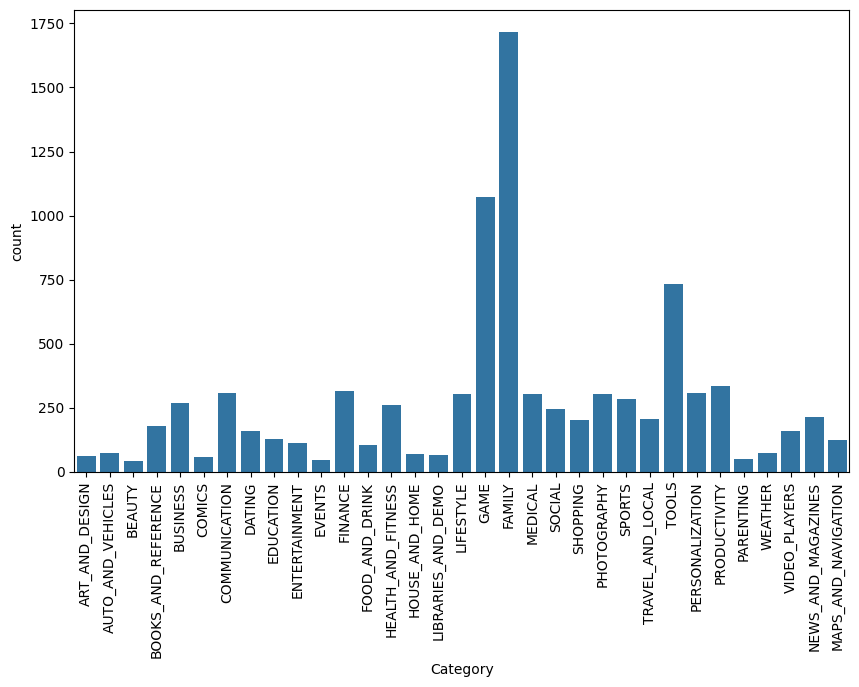

In [56]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_store , x= 'Category')
plt.xlabel=('category')
plt.ylabel=("count")
plt.xticks(rotation=90)
plt.title=('Distribution of App Category')
plt.show()

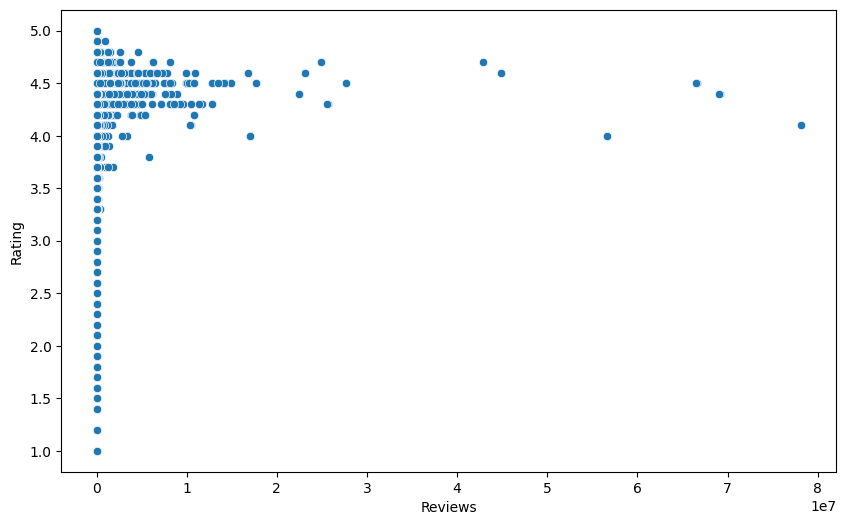

In [57]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_store , x= 'Reviews', y='Rating')
plt.xlabel=('Number of Reviews')
plt.ylabel=("Rating")
#plt.xticks(rotation=90)
plt.title=('THE relation between Reviews and Rating')
plt.show()

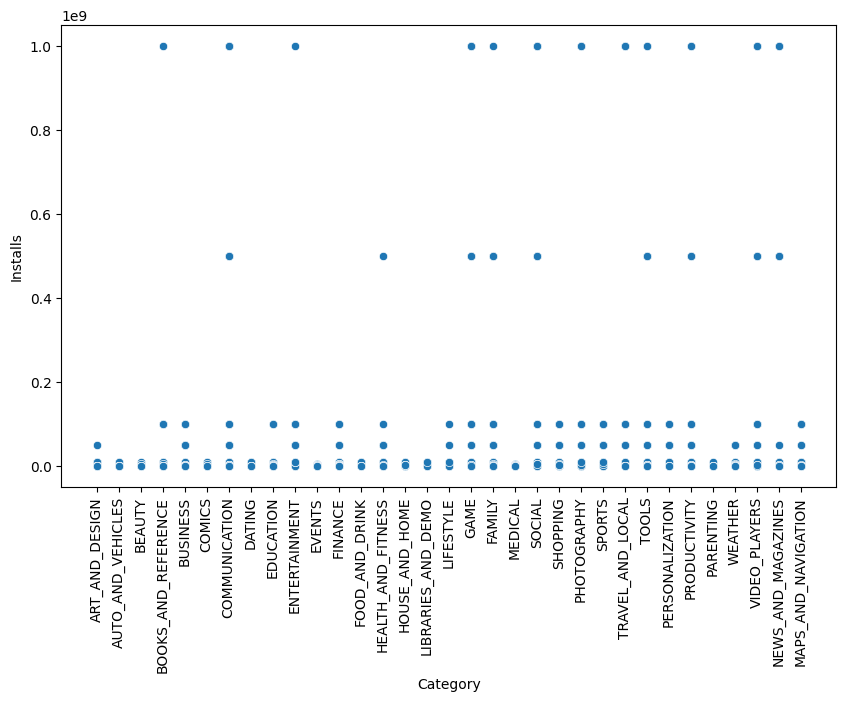

In [58]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_store , x= 'Category', y='Installs')
plt.xlabel=('Category')
plt.ylabel=("Installs")
plt.xticks(rotation=90)
plt.title=('THE relation Installs across Category')
plt.show()

In [69]:
free_apps=df_store[df_store['Type']=='free']
paid_apps=df_store[df_store['Type']=='paid']

In [70]:
# preforming t-test
t_stat,p_value=ttest_ind(free_apps['Rating'],paid_apps['Rating'])

In [63]:
if p_value <0.5 :
  print('Reject null hypothesis : There is a significant diffrent in ratings.')
else :
  print('Fail to reject null hypothesis : There is not significant diffrent in ratings. ')

Fail to reject null hypothesis : There is not significant diffrent in ratings. 


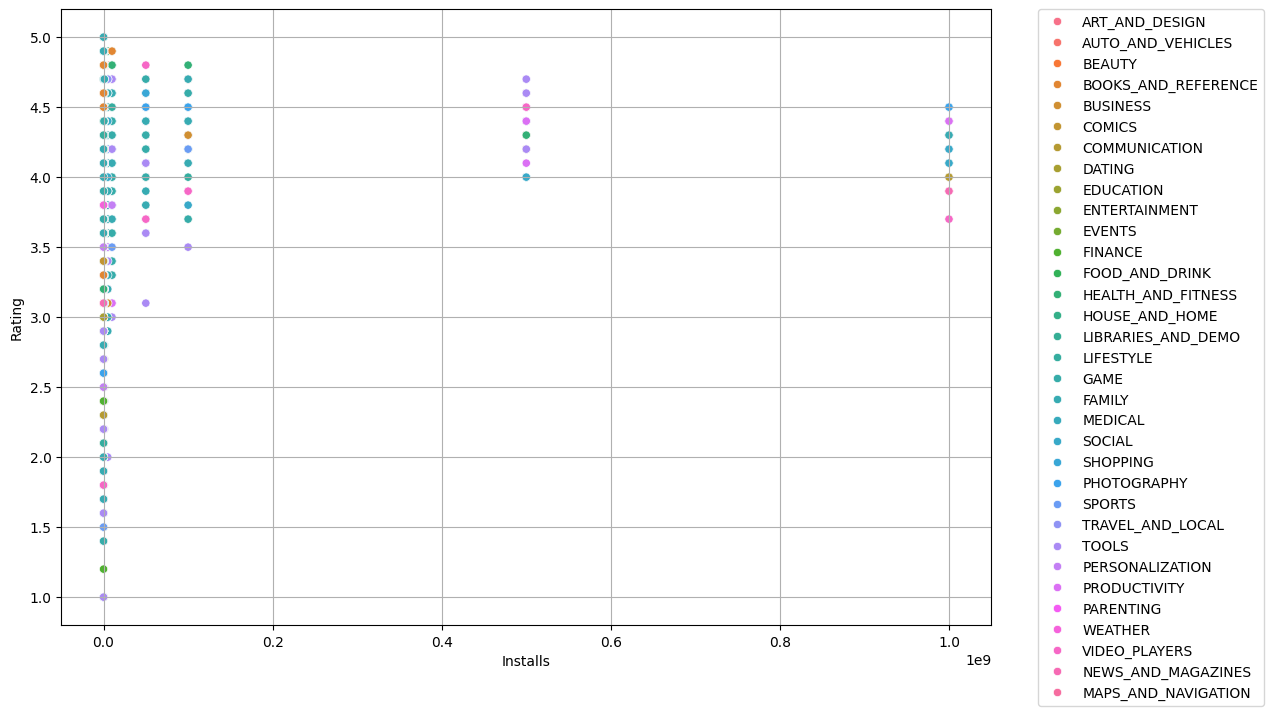

In [99]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df_store , y= 'Rating', x='Installs', hue='Category')
plt.grid(True)
plt.ylabel=('Rating')
plt.xlabel=("number of Installs")
plt.title=("The relation between Ratings and Installs")
plt.legend(bbox_to_anchor=(1.05,1),loc=2 ,borderaxespad=0)
plt.show()

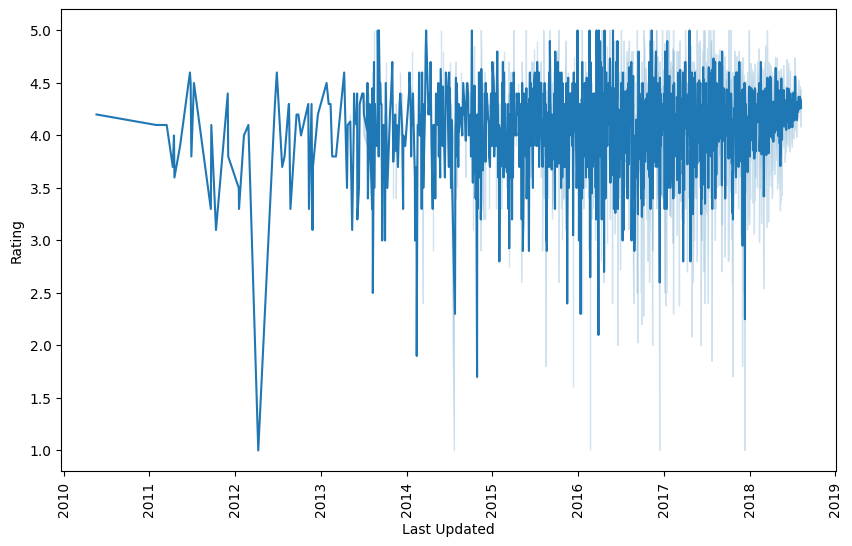

In [132]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df_store ,x= 'Last Updated', y='Rating')
plt.xlabel=('Last Updated')
plt.xticks(rotation=90)
plt.ylabel=("Average Rating")
plt.title=("Average Rating Trend over Time")


In [133]:
df_store.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver
Last Updated,,,,,,,,,,,,
2018-01-07,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,1.0.0,4.0.3 and up
2018-01-15,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up
2018-08-01,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,1.2.4,4.0.3 and up
2018-06-08,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,Varies with device,4.2 and up
2018-06-20,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,1.1,4.4 and up


In [135]:
#df_store['Last Updated'] = pd.to_datetime(df_store['Last Updated'])


#df_store.set_index('Last Updated',inplace=True)


#df_store_monthly =df_store['Rating'].resample('M').mean()

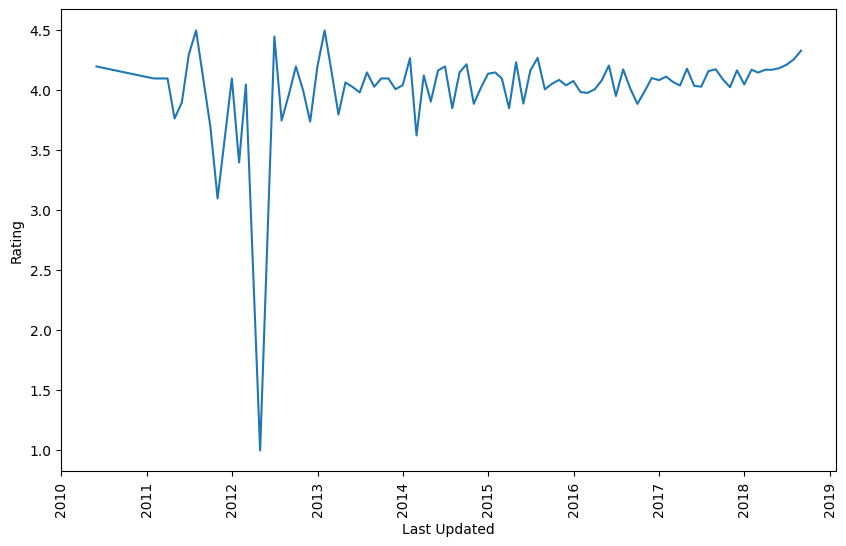

In [136]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df_store_monthly)
plt.xlabel=('Date of last Update (Monthly)')
plt.xticks(rotation=90)
plt.ylabel=("Average Rating")
plt.title=("Average Rating Trend over Time (Monthly)")
plt.show()
